In [185]:
%matplotlib inline
import os
from os.path import join,isfile,isdir
from matplotlib.pyplot import imread,imshow,subplots
import numpy as np
import pandas as pd
import imgaug as ia


In [1]:
## Google Drive Mount

from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount) < 1 : drive.mount('/content/drive', force_remount=False)


Mounted at /content/drive


In [102]:
thePath='/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test/'
iPath=thePath+'/images/'
lPath=thePath+'/labels/'
destPath='/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample_dest/test/'
iDestPath=destPath+'images/'
lDestPath=destPath+'labels/'

In [103]:
if not os.path.exists(iDestPath):
  os.makedirs(iDestPath)
if not os.path.exists(lDestPath):
  os.makedirs(lDestPath)



In [259]:
def addBoudingBox(img,df):
  xw=img.shape[1]
  yh=img.shape[0]
  ib=img
  for r in df.iterrows():
    ll=r[1].to_list()
    xwh=ll[3]/2
    yhh=ll[4]/2
    x1= ( ll[1]-xwh )*xw
    x2= ( ll[1]+xwh )*xw
    y1= ( ll[2]-yhh )*yh
    y2= ( ll[2]+yhh )*yh
    bbsoi = ia.BoundingBoxesOnImage(
        [ia.BoundingBox(x1=x1, y1=y1, x2=x2, y2=y2)], shape=ib.shape)
    ib = bbsoi.draw_on_image(ib,color=(255, 0, 0), size=3)
  return ib




In [104]:
imgs=[iPath+i for i in os.listdir(iPath)]
labs=[lPath+i[0:-3]+'txt' for i in os.listdir(iPath)]
imgs

['/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//images/000084_jpg.rf.93e4382c484fd1cb9cb85aa0c97856a4.jpg',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//images/000034_jpg.rf.7c70c13041866c1f0195b6686606c4d2.jpg',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//images/000097_jpg.rf.f1c053b9bd0e9f4f286bde4b7e4880e8.jpg',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//images/000008_jpg.rf.2db0739ce167e12a1c2a3a46037cf392.jpg',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//images/000011_jpg.rf.bb80027990ed628288961d26c61b9a1f.jpg',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//images/000073_jpg.rf.42cdfcb0697e6d23700e247334bb9d82.jpg',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//images/000076_jpg.rf.32bc9773792c59abf5cbf89d3ce1530c.jpg',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//images/000098_jpg.rf.8ef883186668d5a428f8bb5

In [105]:
labs

['/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//labels/000084_jpg.rf.93e4382c484fd1cb9cb85aa0c97856a4.txt',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//labels/000034_jpg.rf.7c70c13041866c1f0195b6686606c4d2.txt',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//labels/000097_jpg.rf.f1c053b9bd0e9f4f286bde4b7e4880e8.txt',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//labels/000008_jpg.rf.2db0739ce167e12a1c2a3a46037cf392.txt',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//labels/000011_jpg.rf.bb80027990ed628288961d26c61b9a1f.txt',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//labels/000073_jpg.rf.42cdfcb0697e6d23700e247334bb9d82.txt',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//labels/000076_jpg.rf.32bc9773792c59abf5cbf89d3ce1530c.txt',
 '/content/drive/MyDrive/imgAugWithSR_prj/data/HardHatSample/test//labels/000098_jpg.rf.8ef883186668d5a428f8bb5

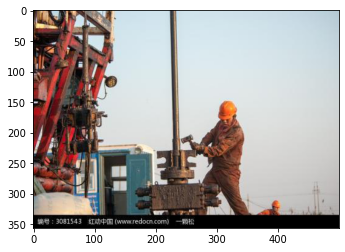

In [287]:
imgPath=imgs[6]
i=imread(imgPath)
imshow(i)


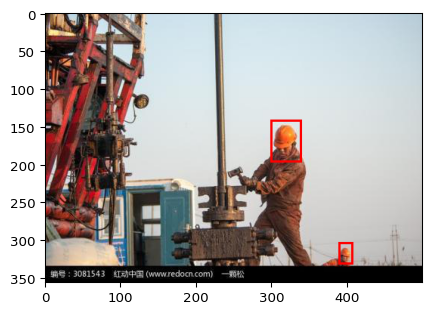

In [288]:
df=pd.read_csv(labs[6],sep=" ", header=None)
ia.imshow(addBoudingBox(i,df))

In [260]:

print(i.shape)
yh=i.shape[0]
ym=int(yh/2)
xw=i.shape[1]
xm=int(xw/2)


i1=i[0:ym,    0:xm   ]
i2=i[0:ym,    xm+1:xw]
i3=i[ym+1:yh, 0:xm   ]
i4=i[ym+1:yh, xm+1:xw]

# ia.imshow(ia.draw_grid([i1,i2,i3,i4],cols=4,rows=1))

(356, 500, 3)


In [283]:
lColumns=['class','xc','yc','xw','yh']
df=pd.read_csv(labs[6],sep=" ", header=None)
df.columns=lColumns

dfp1=pd.DataFrame(None,columns=lColumns)
dfp2=pd.DataFrame(None,columns=lColumns)
dfp3=pd.DataFrame(None,columns=lColumns)
dfp4=pd.DataFrame(None,columns=lColumns)

# r=df.iloc[0,:] 
for i in df.iterrows():
  r1=pd.DataFrame(None,columns=lColumns)
  r2=pd.DataFrame(None,columns=lColumns)
  r3=pd.DataFrame(None,columns=lColumns)
  r4=pd.DataFrame(None,columns=lColumns)
  outBound=False
  if r.xc-r.xw/2 < 0.5 :      # x1 < 0.5
    if r.xc+r.xw/2 <0.5 :     # x2 < 0.5
      if r.yc-r.yh/2 <0.5 :   # y1 < 0.5
        if r.yc+r.yh/2 < 0.5: # y2 < 0.5
          # 1
          r1.xc = r.xc   *2
          r1.xw = r.xw   *2
          r1.yc = r.yc   *2
          r1.yh = r.yh   *2
        else:                 # y2 >= 0.5 
          # 1 and 3
          r1.xc = r.xc   *2
          r1.xw = r.xw   *2
          r1.yc = 0.5    *2
          r1.yh = 0.5    *2

          r3.xc = r.xc   *2
          r3.xw = r.xw   *2
          r3.yc = (r.yc+r.yh - 0.5) /2  * 2
          r3.yh = (r.yh+r.yh - 0.5)     * 2
      else:                   # y1 >= 0.5      
         # 3
         r3.xc = r.xc   * 2
         r3.xw = r.xw   * 2
         r3.yc = r.yc   * 2
         r3.yh = r.yh   * 2
    else:           #x1 < 0.5  # x2 >= 0.5
      if r.yc-r.yh/2 <0.5 :   # y1 < 0.5
        if r.yc+r.yh/2 < 0.5: # y2 < 0.5        
          # 1  2
        else:                 # y2 >= 0.5 
          # 1 2 3 4
      else:                   # y1 >= 0.5      
          # 3 4
  else:                       # x1 >= 0.5
    if r.yc+r.yw/2 < 0.5:     # y2 < 0.5
      # 2
    else:
      if r.yc-r.yw/2 < 0.5:   # y1 >=0.5
        # 2 4

      else:                   # y1 >=0.5
        # 4


  if len(r1)  :
    dfp1.append(r1)
  if len(r2)  :
    dfp2.append(r2)
  if len(r3)  :
    dfp3.append(r3)
  if len(r4)  :
    dfp4.append(r4)

dfp


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,class,xc,yc,xw,yw
